# WORKSHOP N ° 3
Progettazione di una chiesa secondo il progetto di Leonardo da Vinci

In [105]:
from larlib import *
from Chiesa import *
def SEMISPHERE (radius):
    """
    SEMISPHERE(10)([8,20]) 
    :param radius: radius of the SEMISPHERE
    :param subds: subcells forming the (semi)sphere
    :return: pyplasm.xgepy.Hpc
    """
    def SPHERE0 (subds):
        N , M = subds
        domain = Plasm.translate( Plasm.power(INTERVALS(PI/2)(N) , INTERVALS(2*PI)(M)), Vecf(0, -PI/2,0 ) )
        fx  = lambda p: radius * math.cos(p[0])  * math.sin  (p[1])
        fy  = lambda p: radius * math.cos(p[0]) * math.cos (p[1])
        fz  = lambda p: radius * math.sin(p[0])
        ret=  MAP([fx, fy, fz])(domain)
        return ret
    return SPHERE0

def dome(radius):
    """
    dome(10)
    :param radius: radius of the dome
    :return: pyplasm.xgepy.Hpc
    """
    d = JOIN([SEMISPHERE(radius)([8,8])])
    return R([1,3])(-PI)(d)

def scalini(raggio,altezza,numangoli) :
           Scale = CYLINDER([raggio,altezza])(numangoli)
           return Scale
		   
def primopiano(c1,c2,c3,m1,m2,m3):
    Muro = CYLINDER([c1,c2])(c3)
    Muro_interno = CYLINDER([m1,m2])(m3)
    Cinta_muro = DIFFERENCE([Muro,Muro_interno])
    Porta = S([1,2,3])([4,8,15])(CUBOID([1,1,1]))
    PortaT= T(1)(21)(Porta)
    Porte = STRUCT(NN(14)([PortaT,R([1,2])(PI/5)]))
    Muro_esterno = DIFFERENCE([Cinta_muro,Porte])
    M_i = STRUCT([COLOR([0.9,0.7,0.3])(CYLINDER([m1,m2])(m3))])
    Muro_completo= STRUCT([Muro_esterno,M_i])
    Ornamento_sup = scalini(27,2,60)
    Ornamento_sup = T (3)(20) (Ornamento_sup)
    Muro_completo = STRUCT([Muro_completo,Ornamento_sup])
    
    return Muro_completo
	
def strutturaconcupola(r,a,an,infocupola):
    Colonna = scalini(r,a,an)
    Cupola = dome(infocupola)
    Cupola = T(3)(40)(Cupola)
    Cupola = STRUCT([COLOR([0.9,0.7,0.3]),(Cupola)])
    Croce1 = CYLINDER([0.5,7.5])(8)
    Croce1 = T(3)(50)(Croce1)
    Cupola = STRUCT([Cupola,Croce1])
    Croce2 = CYLINDER([0.5,4])(8)
    Croce2 = R([1,3])(PI/2)(Croce2)
    Croce2 = T([1,3])([2,56])(Croce2)
    Cupola = STRUCT([Cupola,Croce2])    
    TColonnaCentrale =scalini(14.5,1,8)
    TTColonnaCentrale = T(3)(40)(TColonnaCentrale)
    TColonnaCentrale2 = scalini(15,1,8)
    TTColonnaCentrale2 = T(3)(41)(TColonnaCentrale2)
    TColonnaCentrale3 = scalini(15.5,1,8)
    TTColonnaCentrale3 = T(3)(42)(TColonnaCentrale3)
    ParteSup = STRUCT ([TTColonnaCentrale,TTColonnaCentrale2,TTColonnaCentrale3])
    Colonna = STRUCT([Colonna,ParteSup])
    Colonna = STRUCT([Colonna,Cupola])
    return Colonna
	
def strutturaconcupolasup():
    CupoleSup = scalini(6.5,9,8)
    CupoleSupVuota = DIFFERENCE([CupoleSup,CYLINDER([4.5,9])(8)])
    Porta_cupole= S([1,2,3])([3.5,3,8])(CUBOID([1,1,1]))
    Porte_c = T(1)(3)(Porta_cupole)
    Porte_totali = STRUCT(NN(8)([Porte_c,R([1,2])(PI/4)]))
    Cupolefinite = DIFFERENCE([CupoleSupVuota,Porte_totali])
    Riempimento_cupole = STRUCT([COLOR([0.9,0.7,0.3])(CYLINDER([5.5,9])(8))])
    Cupole_totali = STRUCT([Cupolefinite,Riempimento_cupole])
    Cupola = dome(6.5)
    Cupola = T(3)(8.5)(Cupola)
    Cupola = STRUCT([COLOR([0.9,0.7,0.3]),(Cupola)])
    Struttura = STRUCT([Cupole_totali,Cupola])
    TCupoleSup = T([1,3])([19,21])(Struttura)
    return TCupoleSup
def strutturacompleta(oggetto) :
    Prato = STRUCT([COLOR([0,0.8,0.1]),(CYLINDER([60,2])(4))])
    Prato = T(3)(-2)(Prato)
    Completo = STRUCT([oggetto,Prato])
    return Completo

In [106]:
#Progettazione rampa di scale esterna
Scalino1 = scalini(34,1,60)
Scalino2 = scalini(32,2,60)
Scalino3 = scalini(30,3,60)
Scale = STRUCT([Scalino1,Scalino2,Scalino3])
VIEW(Scale)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x000000002956B270> >

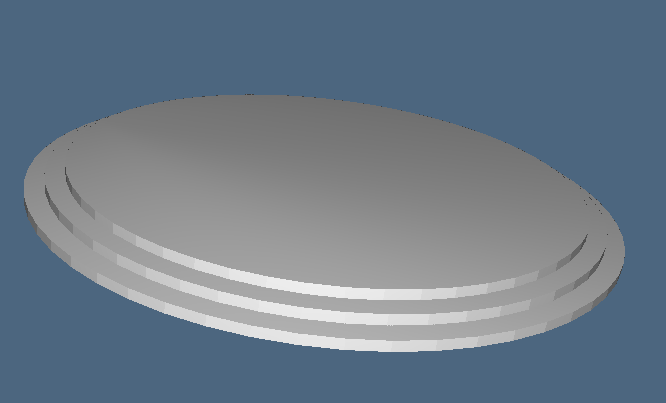


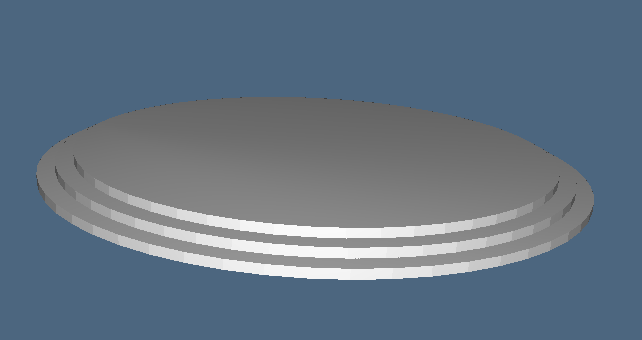

In [112]:
#Esempio cupola
Esempio_cupola = dome(16)
VIEW(Esempio_cupola)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x000000002962AA80> >

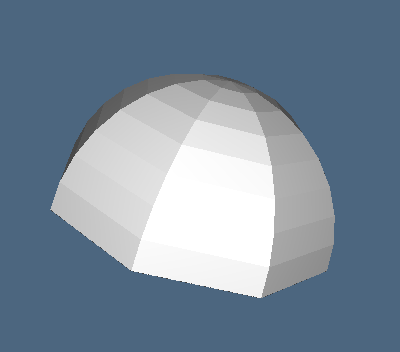

In [113]:
#Parte inferiore della struttura
Parte_inferiore=primopiano(25,20,14,23,20,14)
VIEW(Parte_inferiore)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x000000002962AC30> >

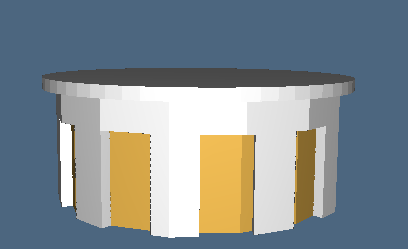

In [108]:
#Colonna centrale
ColonnaCentrale = strutturaconcupola(14,40,8,14)
VIEW(ColonnaCentrale)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x000000002956E540> >

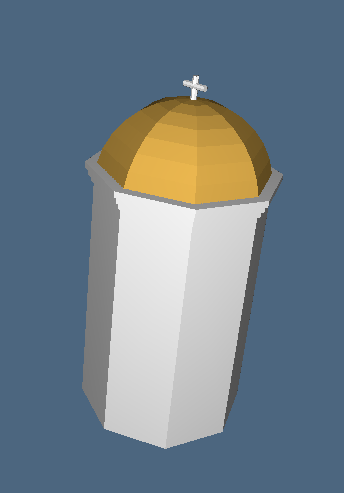

In [109]:
#Cupole superiori
Cupole = strutturaconcupolasup()
CupolePlus = STRUCT ( NN(8)([Cupole,R([1,2])(PI/4)]))
VIEW(CupolePlus)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x000000002956C120> >

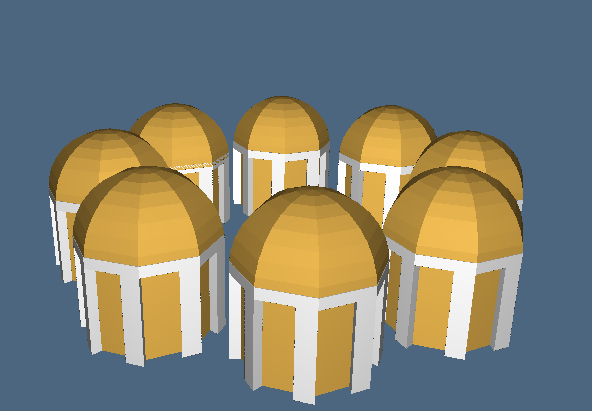

In [110]:
#Composizione finale della struttura
Oggetto_semi = STRUCT([Scale,Parte_inferiore,ColonnaCentrale,CupolePlus])
VIEW(Oggetto_semi)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x000000002956CD80> >

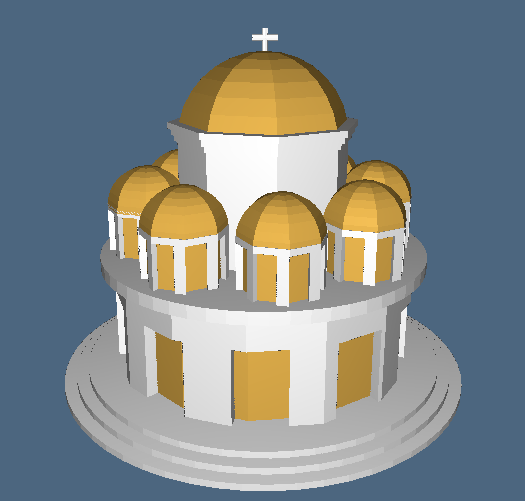

In [111]:
#Chiesa completa con prato e strada
Esempiofinito = strutturacompleta(Oggetto_semi)
VIEW(Esempiofinito)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x000000002956E900> >

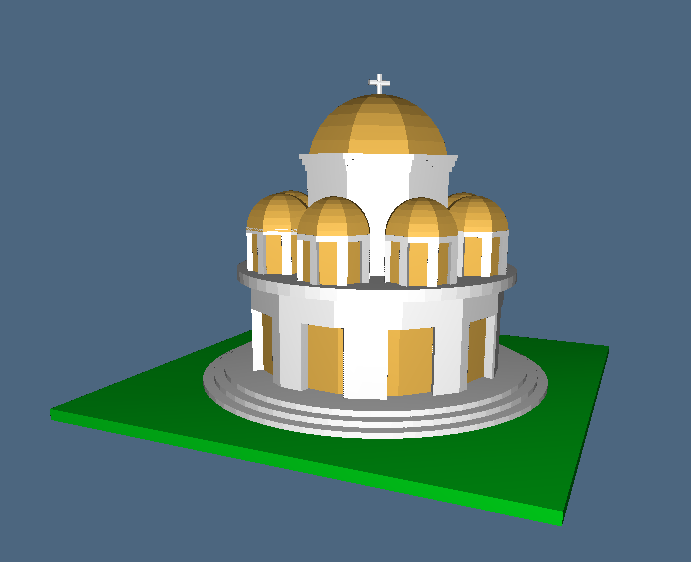